# Predicting Breast Cancer - Preprocessing and Modelling

## Capstone Project Two: Springboard Data Science Career Track 

### Notebook by Manthan Desai

## Introduction:

## 1. Problem Statement:

Breast cancer is an increasingly common and dangerous disease for women that forms in the cells of the breast. Nearly 12% of women worldwide are affected by the disease. Early detection remains vital for successful treatment of the disease and improved outcomes. Machine learning algorithms can help improve the accuracy of breast cancer detection by analyzing large-scale datasets for relevant trends and most important features. 

In the context of this problem, how can tumors be classified as benign or malignant with a minimum accuracy of 80% based on nine features that describe the tumor?

## 2. The Data:

The dataset is acquired from OpenML.org
(https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfInstances=between_10000_100000&id=251). 

The dataset is comprised of the follwing fields:

 - id - Patient ID
 - Clump_Thickness - Indicates grouping of cancer cells in multilayer (Values range from 1-10).
 - Cell_Size_Uniformity - Indicates metastasis to lymph nodes (Values range from 1-10).
 - Cell_Shape_Uniformity - Identifies cancerous cells of varying size (Values range from 1-10).
 - Marginal_Adhesion - Quantifies loss of adhesion in cells (Values range from 1-10).
 - Single_Epi_Cell_Size - Quantifies the size of the epithelial cells (Values range from 1-10).
 - Bare_Nuclei - Quantifies the presence of bare nuclei in the cells (Values range from 1-10).
 - Bland_Chromatin - Quantifies the presence of bland chromatin in the cells (Values range from 1-10).
 - Normal Nucleoli - Quantifies the presence of normal nucleoli in the cells (Values range from 1-10).
 - Mitoses - Quantifies the stage of Mitoses in the cells (Values range from 1-10).
 - Class - The target variable that qualifies tumors as malignant (1) or benign (0) 

## 3. Library Imports and Load the Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
bc_data = pd.read_csv('../data/bc_data_cleaned.csv')

In [3]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39317 entries, 0 to 39316
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     39317 non-null  int64  
 1   Clump_Thickness        39317 non-null  float64
 2   Cell_Size_Uniformity   39317 non-null  float64
 3   Cell_Shape_Uniformity  39317 non-null  float64
 4   Marginal_Adhesion      39317 non-null  float64
 5   Single_Epi_Cell_Size   39317 non-null  float64
 6   Bare_Nuclei            39317 non-null  float64
 7   Bland_Chromatin        39317 non-null  float64
 8   Normal_Nucleoli        39317 non-null  float64
 9   Mitoses                39317 non-null  float64
 10  Class                  39317 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 3.3+ MB


In [4]:
bc_data.set_index('id')

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
id,,,,,,,,,,
1,7.581819,9.745087,1.000000,4.503410,7.039930,10.000000,4.412282,10.000000,5.055266,malignant
2,5.210921,8.169596,7.841875,6.033275,4.269619,10.000000,4.236312,4.845350,1.000000,malignant
3,4.000000,4.594296,2.330380,2.000000,3.000000,1.000000,10.701823,1.101305,1.000000,benign
4,2.428871,1.000000,1.000000,1.000000,4.099291,1.000000,2.000000,1.000000,1.000000,benign
5,8.855971,2.697539,6.047068,3.301891,3.000000,1.000000,5.297592,4.104791,3.115741,malignant
...,...,...,...,...,...,...,...,...,...,...
39362,9.927819,9.356578,8.735863,9.857325,7.899676,10.000000,2.000000,7.783836,3.000000,malignant
39363,4.781275,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,benign
39364,5.479501,9.688672,2.000000,3.415991,5.915206,10.000000,7.930997,5.689254,5.650542,malignant


In [5]:
bc_data['Class'].value_counts()

benign       25796
malignant    13521
Name: Class, dtype: int64

In [6]:
#convert Class value columns to 0: benign, 1: malignant
bc_data['Class'] = bc_data['Class'].map({'malignant': 1, 'benign': 0})
bc_data.head()

,id,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,7.581819,9.745087,1.000000,4.503410,7.039930,10.0,4.412282,10.000000,5.055266,1
1,2,5.210921,8.169596,7.841875,6.033275,4.269619,10.0,4.236312,4.845350,1.000000,1
2,3,4.000000,4.594296,2.330380,2.000000,3.000000,1.0,10.701823,1.101305,1.000000,0
3,4,2.428871,1.000000,1.000000,1.000000,4.099291,1.0,2.000000,1.000000,1.000000,0
4,5,8.855971,2.697539,6.047068,3.301891,3.000000,1.0,5.297592,4.104791,3.115741,1


The data does not require scaling because it has already been standardized to values 1-10 for each feature. There are no features that require one-hot encoding since each is numeric.

## 4. Train/test splitting of the data

In [7]:
X = bc_data.drop(['id','Class'], axis=1)
y = bc_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [8]:
X_train.shape, X_test.shape

((29487, 9), (9830, 9))

In [9]:
y_train.shape, y_test.shape

((29487,), (9830,))

## 5: First Model - Logistic Regression

In [10]:
log_model = LogisticRegression(penalty = 'l2', C = 10,random_state = 100).fit(X_train,y_train)
y_train_pred_log = log_model.predict(X_train)
y_test_pred_log = log_model.predict(X_test)

In [11]:
#Confusion Matrix
cnf_matrix= confusion_matrix(y_test,y_test_pred_log)
print(cnf_matrix)
accuracy_log= log_model.score(X_test,y_test)
print(accuracy_log)

[[6309  114]
 [  92 3315]]
0.9790437436419125


In [12]:
#Cross Validation
cv_scores_test= cross_val_score(log_model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(log_model,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_test_log = cv_scores_test.mean()
cv_scores_train_log = cv_scores_train.mean()
cv_scores_std_test_log = cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_test_log))
print ('Mean cross validation train score: ' +str(cv_scores_train_log))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_log))

[0.99779793 0.99689173 0.99737168 0.99726729 0.99828364]
Mean cross validation test score: 0.9975224538853098
Mean cross validation train score: 0.9977749543735079
Standard deviation in cv test scores: 0.0004776891397368129


In [13]:
#classification score
print('Classification Report On Test Dataset')
print(classification_report(y_test,y_test_pred_log))

Classification Report On Test Dataset
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6423
           1       0.97      0.97      0.97      3407

    accuracy                           0.98      9830
   macro avg       0.98      0.98      0.98      9830
weighted avg       0.98      0.98      0.98      9830



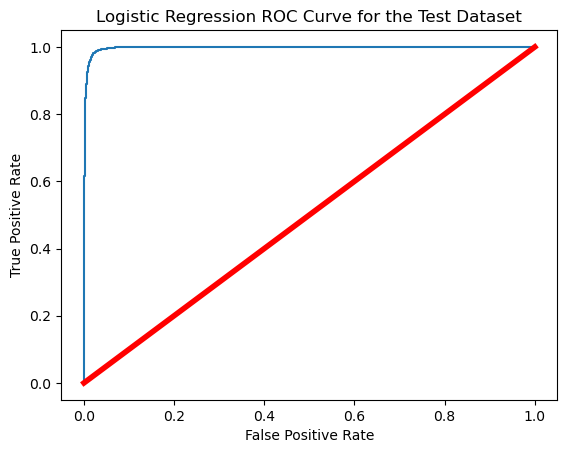

In [14]:
#plotting roc curve
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC Curve for the Test Dataset')
plt.show()

## 6: Second Model - Random Forest

In [15]:
rf_model = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy').fit(X_train,y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [16]:
#Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred_rf)
print(cnf_matrix)
accuracy_rf=rf_model.score(X_test,y_test)
print(accuracy_rf)

[[6325   98]
 [  53 3354]]
0.9846388606307223


In [17]:
#Cross Validation
cv_scores_test= cross_val_score(rf_model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf_model,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_test_rf = cv_scores_test.mean()
cv_scores_train_rf = cv_scores_train.mean()
cv_scores_std_test_rf = cv_scores_test.std()
print ('Mean cross validation test score: ' + str(cv_scores_test_rf))
print ('Mean cross validation train score: ' + str(cv_scores_train_rf))
print ('Standard deviation in cv test scores: ' + str(cv_scores_std_test_rf))

[0.9976088  0.9982516  0.99809618 0.99807637 0.99870102]
Mean cross validation test score: 0.9981467956217296
Mean cross validation train score: 0.9985817953681204
Standard deviation in cv test scores: 0.00035074388105368757


In [18]:
#classification score
print('Classification Report on Test Dataset')
print(classification_report(y_test,y_test_pred_rf))

Classification Report on Test Dataset
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6423
           1       0.97      0.98      0.98      3407

    accuracy                           0.98      9830
   macro avg       0.98      0.98      0.98      9830
weighted avg       0.98      0.98      0.98      9830



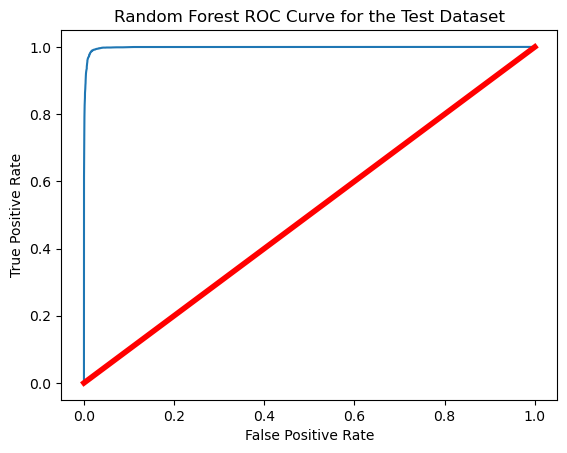

In [19]:
#plotting roc curve
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest ROC Curve for the Test Dataset')
plt.show()

#### Random Forest feature importance

Text(0.5, 1.0, 'Random Forest Feature Importance')

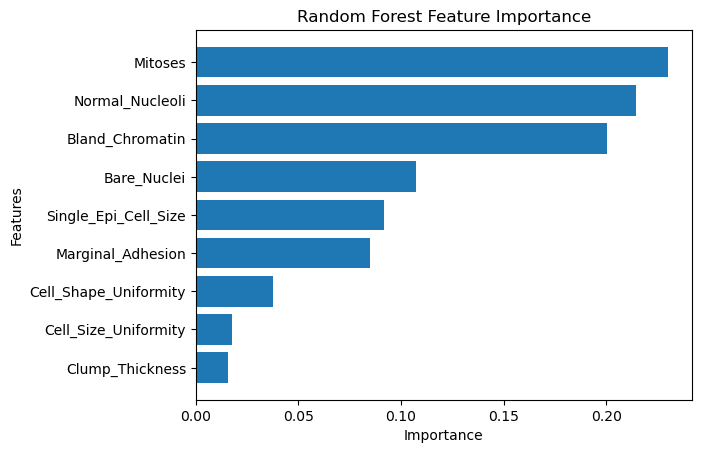

In [20]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X.columns, rf_model.feature_importances_[sorted_idx])
plt.xlabel("Importance")
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')

By all metrics, the models are performing exceptionally well (>0.98 accuracy on test dataset). This raises some questions about the state of the dataset, chief among them being if there are colinear features that lead to overfitting. Therefore, by obtaining the feature importance, we can remove the most important feature from the dataset and refit the model to see its effect.

#### Reapply random forest model on data without the most important feature (Mitoses)

In [21]:
X = bc_data.drop(['id','Class', 'Mitoses'], axis=1)
y = bc_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [22]:
rf_model2 = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy').fit(X_train,y_train)
y_train_pred_rf = rf_model2.predict(X_train)
y_test_pred_rf = rf_model2.predict(X_test)

In [23]:
#Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred_rf)
print(cnf_matrix)
accuracy_rf=rf_model2.score(X_test,y_test)
print(accuracy_rf)

[[6303  120]
 [  57 3350]]
0.9819938962360122


In [24]:
#classification score
print('Classification Report on Test Dataset')
print(classification_report(y_test,y_test_pred_rf))

Classification Report on Test Dataset
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6423
           1       0.97      0.98      0.97      3407

    accuracy                           0.98      9830
   macro avg       0.98      0.98      0.98      9830
weighted avg       0.98      0.98      0.98      9830



Removing the most important feature from the dataset did not impact the model performance, suggesting the likelihood of colinearity among the features.

## 7: Third Model - XGBoost

In [25]:
X = bc_data.drop(['id','Class'], axis=1)
y = bc_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [26]:
xgb_classifier = xgb.XGBClassifier().fit(X_train, y_train)
y_train_pred_xgb = xgb_classifier.predict(X_train)
y_test_pred_xgb = xgb_classifier.predict(X_test)

In [27]:
#Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred_xgb)
print(cnf_matrix)
accuracy_xgb = xgb_classifier.score(X_test,y_test)
print(accuracy_xgb)

[[6329   94]
 [  49 3358]]
0.9854526958290946


In [28]:
#Cross Validation
cv_scores_test= cross_val_score(xgb_classifier,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(xgb_classifier,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_test_xgb = cv_scores_test.mean()
cv_scores_train_xgb = cv_scores_train.mean()
cv_scores_std_test_xgb = cv_scores_test.std()
print ('Mean cross validation test score: ' + str(cv_scores_test_xgb))
print ('Mean cross validation train score: ' + str(cv_scores_train_xgb))
print ('Standard deviation in cv test scores: ' + str(cv_scores_std_test_xgb))

[0.99870641 0.99823217 0.99838187 0.99843666 0.99869131]
Mean cross validation test score: 0.998489685420861
Mean cross validation train score: 0.9989520113866794
Standard deviation in cv test scores: 0.00018350672315885916


#### XGBoost Feature Importance

Text(0.5, 1.0, 'XGBoost Feature Importance')

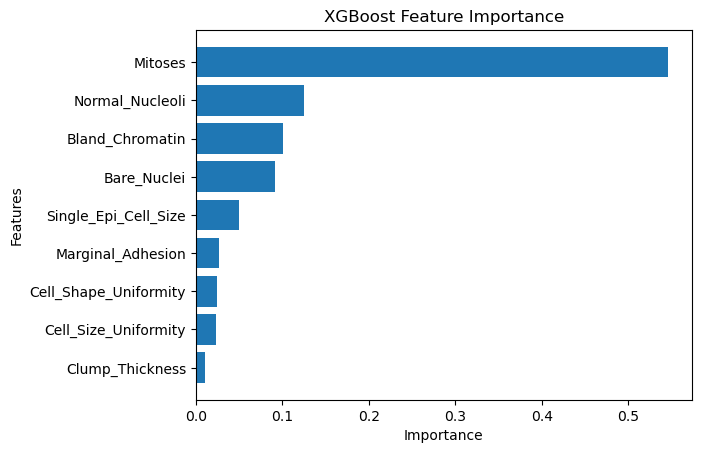

In [29]:
sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.barh(X.columns, xgb_classifier.feature_importances_[sorted_idx])
plt.xlabel("Importance")
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')

## 8: Model Comparison

In [30]:
labels = ['Logistic Regression','Random Forest','Gradient Boost']
score_test= [cv_scores_test_log,cv_scores_test_rf,cv_scores_test_xgb]
score_train= [cv_scores_train_log,cv_scores_train_rf,cv_scores_train_xgb]
accuracy_scores = [accuracy_log,accuracy_rf,accuracy_xgb]

score_tab_acc = pd.DataFrame(list(zip(labels, accuracy_scores)), columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(labels, score_train, score_test)), 
                         columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.979044
1        Random Forest              0.981994
2       Gradient Boost              0.985453


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.997775,0.997522
1,Random Forest,0.998582,0.998147
2,Gradient Boost,0.998952,0.998490


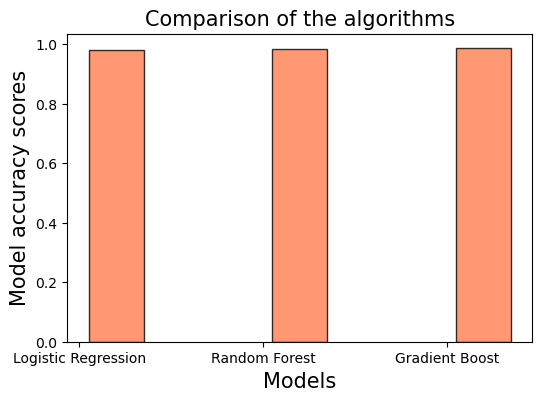

In [31]:
#plotting the accuracy scores:
index=[1,2,3]
index_acc=[1.2,2.2,3.2]

plt.figure(figsize=(6,4))
plt.bar(index_acc,accuracy_scores,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)

plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
plt.xticks([1,2,3], labels)
plt.show()

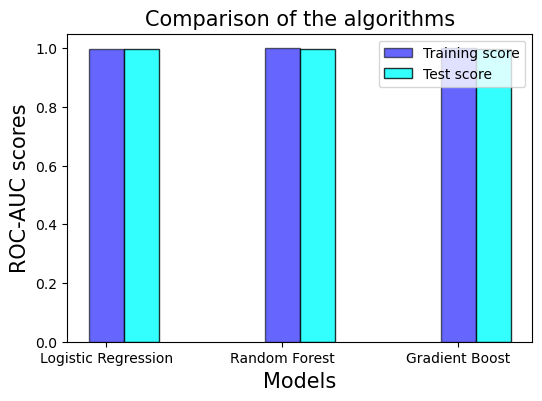

In [32]:
#plotting and comparing ROC-AUC train/test scores
index=[1,2,3]
index_acc=[1.2,2.2,3.2]

plt.figure(figsize=(6,4))
plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)

plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
plt.xticks([1,2,3], labels)
plt.legend()
plt.show()

## Conclusions

- To classify the ~39000 tumor entries in the dataset as benign or malignant, I used all nine major features from the dataset to train the following models:
    - Logistic Regression
    - Random Forest
    - XGBoost
    
- By Random Forest and XGBoost models, the most important feature in the dataset was 'mitoses', followed by 'Normal_Nucleoli' and 'Bland Chromatin'. However, upon removing 'Mitoses' and refitting the random forest model to the new dataset, there was no major drop in test dataset accuracy.

- Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

- I evaluated each model in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and plotted them. Among the three models, there isn't a significant difference in performance. Each model has unrealistically high scores which suggests the presence of data leakage and other fundamental issues with the dataset, such as:
    - The dataset is missing many key features that can directly influence the outcome of the target variable such as the time passed since initial prognosis, Tumor stage, etc.
    - The dataset is also static, i.e, the data is collected at a fixed point in time as opposed to a collection over a period of time. This robs us of understanding the progression of the tumor and therefore comparing each tumor on an even scale. With the current dataset, it is possible that entries which are classified as malignant tumor are derived from individuals already diagnosed and in the later stages of cancer.

- These fundamental issues with the dataset defeat the purpose of machine learning in this instance, because we want to be able to use ML models as supplement to the real-world situations, i.e, being able to predict potential malignant tumors before they are diagnosed by the doctors. While we can fit models to this dataset and achieve high accuracy results, there isn't many obvious real world utility.